In [98]:
import os
import pandas as pd
import seaborn as sns

In [99]:
# Global Variables
CURR_DIR_PATH = os.path.dirname(os.path.realpath('__file__'))
file_path = CURR_DIR_PATH + '/Bostader/clean/'
files     = os.listdir(file_path)
df_list   = [] 


In [100]:
for file in files:
    if file.startswith('clean'):
        print(file_path + file)
        df = pd.read_csv(
            file_path + file,
            index_col  =False,
            engine     = 'python',
            skipfooter = 6)
        df_list.append(df)

/Users/alexanderhansson/Documents/Project_IDEAs/EkonomiSCB/Bostader/clean/clean_Försäljning_av_bostadsrätter_efter_region.csv
/Users/alexanderhansson/Documents/Project_IDEAs/EkonomiSCB/Bostader/clean/clean_Fastighetsprisindex_för_lantbruk.csv
/Users/alexanderhansson/Documents/Project_IDEAs/EkonomiSCB/Bostader/clean/clean_Tillförsel_av_el-energi.csv
/Users/alexanderhansson/Documents/Project_IDEAs/EkonomiSCB/Bostader/clean/clean_Disponibel_inkomst_för_hushåll_efter_region.csv
/Users/alexanderhansson/Documents/Project_IDEAs/EkonomiSCB/Bostader/clean/clean_Fastighetsprisindex_för_fritidshus_(1981=100)_efter_region.csv
/Users/alexanderhansson/Documents/Project_IDEAs/EkonomiSCB/Bostader/clean/clean_Genomsnittlig_årshyra_per_kvm_för_riket_efter_region.csv
/Users/alexanderhansson/Documents/Project_IDEAs/EkonomiSCB/Bostader/clean/clean_Fastighetsprisindex_för_permanenta_småhus_(1981=100)_efter_region.csv


In [101]:
# print(df_list)
print(df_list.sort())

ValueError: Can only compare identically-labeled DataFrame objects

In [105]:
big_df = df_list[0]
# big_df.merge(df_list[1], on = 'år', how = 'right')
for df in df_list[1:]:
    if 'år' in df.columns:
        big_df = big_df.merge(df, on = 'år', how = 'left')
    else:
        big_df = big_df.merge(df)
# print(big_df.isna().sum())
big_df = big_df.fillna(0.0)
# dfc = big_df.dropna()
# dfc
big_df.replace('..', 0.0)

,år,Antal,Medelpris_i_tkr,Medianpris_i_tkr,Fastighetsprisindex_för_lantbruk_1992=100,Brutto,Netto,Egenanvändning,ålder,Medelvärde__tkr,Medianvärde_tkr,Medelvärde_procent_av_samtliga_hushåll,Medianvärde_procent_av_samtliga_hushåll,Fastighetsprisindex_för_fritidshus_(1981=100),Genomsnittlig_årshyra_per_kvm_kr,±_Felmarginal_kr,Fastighetsprisindex_för_permanenta_småhus_(1981=100)
0,2000,72392,390,173,154,163893,160181,3712,0.0,0.0,0.0,0.0,0.0,306,724.0,3.0,263
1,2001,72096,441,225,165,172779,168799,3980,0.0,0.0,0.0,0.0,0.0,335,732.0,4.0,284
2,2002,76297,526,295,168,166842,163344,3498,0.0,0.0,0.0,0.0,0.0,358,755.0,4.0,302
3,2003,81161,571,360,172,159721,156821,2900,0.0,0.0,0.0,0.0,0.0,383,774.0,3.0,322
4,2004,84787,671,455,190,168100,164470,3630,0.0,0.0,0.0,0.0,0.0,424,798.0,3.0,353
5,2005,89848,776,530,207,173634,169558,4076,0.0,0.0,0.0,0.0,0.0,470,818.0,3.0,387
6,2006,92697,933,650,235,160847,157786,3061,0.0,0.0,0.0,0.0,0.0,527,826.0,3.0,431
7,2007,99455,1117,795,264,164793,160937,3856,0.0,0.0,0.0,0.0,0.0,588,842.0,3.0,477
8,2008,89899,1080,800,296,162404,158715,3689,0.0,0.0,0.0,0.0,0.0,603,867.0,3.0,491
9,2009,94717,1193,880,298,150452,146971,3482,0.0,0.0,0.0,0.0,0.0,633,898.0,3.0,501


In [102]:
# sns.heatmap(big_df.corr(), cmap = "Greens", annot = True, fmt = ".1f")

Index(['år', 'Antal', 'Medelpris_i_tkr', 'Medianpris_i_tkr',
       'Fastighetsprisindex_för_lantbruk_1992=100', 'Brutto', 'Netto',
       'Egenanvändning', 'ålder', 'Medelvärde__tkr', 'Medianvärde_tkr',
       'Medelvärde_procent_av_samtliga_hushåll',
       'Medianvärde_procent_av_samtliga_hushåll',
       'Fastighetsprisindex_för_fritidshus_(1981=100)',
       'Genomsnittlig_årshyra_per_kvm_kr', '±_Felmarginal_kr',
       'Fastighetsprisindex_för_permanenta_småhus_(1981=100)'],
      dtype='object')


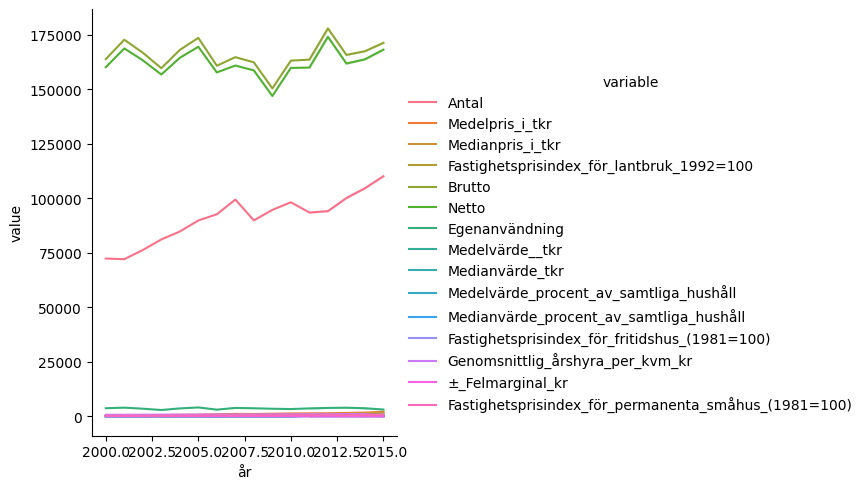

In [107]:
print(big_df.columns)
# sns.relplot(
#     data = big_df, 
#     kind = 'line',
#     x = 'år',
#     y = 'Antal')
sns.relplot(
    data = pd.melt(big_df.drop('ålder', axis = 1), ['år']),
    x    = 'år',
    y    = 'value',
    hue  = 'variable',
    kind = 'line',
    )

       år        variable   value
0    1986          Brutto  140486
1    1987          Brutto  148745
2    1988          Brutto  151294
3    1989          Brutto  155144
4    1990          Brutto  159417
..    ...             ...     ...
103  2017  Egenanvändning    3768
104  2018  Egenanvändning    3724
105  2019  Egenanvändning    2793
106  2020  Egenanvändning    2919
107  2021  Egenanvändning    3175

[108 rows x 3 columns]


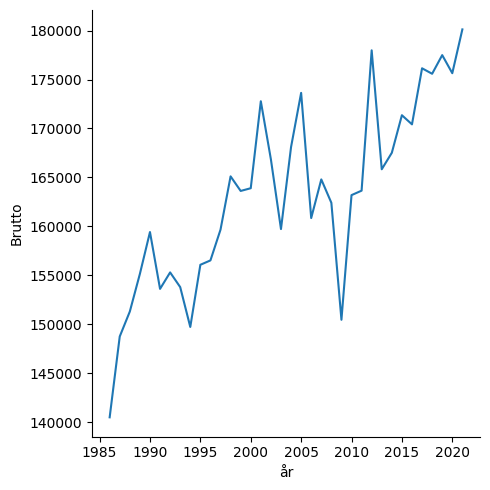

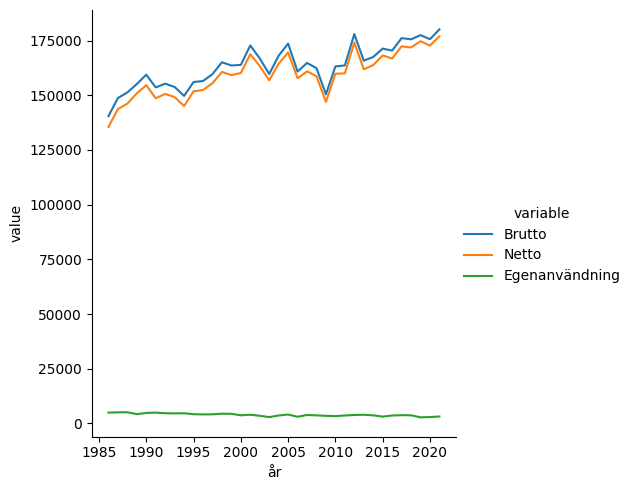

In [ ]:
clean_el = CURR_DIR_PATH + '/Bostader/clean/clean_Tillförsel_av_el-energi.csv'

df = pd.read_csv(clean_el)
df_melt = pd.melt(df, ['år'])

sns.relplot(
    data = df, 
    x    = 'år',
    y    = 'Brutto',
    kind = 'line',
    )
sns.relplot(
    data = pd.melt(df, ['år']), 
    x    = 'år',
    y    = 'value',
    hue  = 'variable',
    kind = 'line',
    )